In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
stocks = ['FE', 'WMT', 'AAPL']
mu = [0.04, 0.09, 0.12]
sigma = [0.15, 0.20, 0.35]


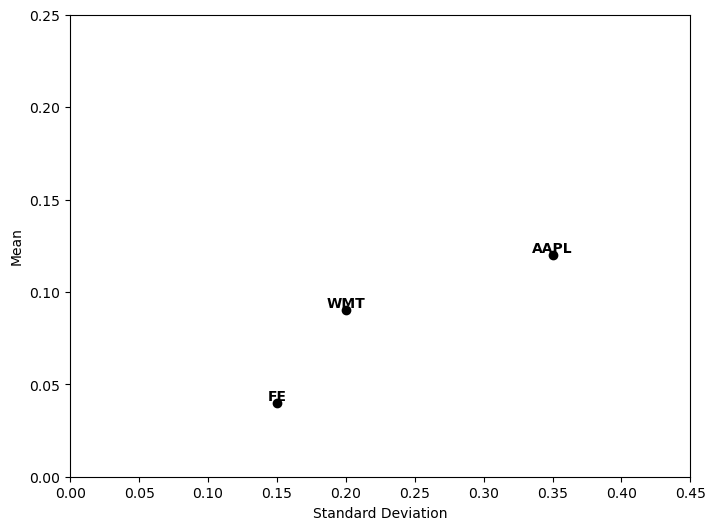

In [192]:
def plot_points(mu, sigma,stocks):
    plt.figure(figsize=(8,6))
    plt.scatter(sigma, mu, c='black') 
    plt.xlim(0,0.45)
    plt.ylim(0,0.25)
    plt.ylabel('Mean')
    plt.xlabel('Standard Deviation')
    for i, stock in enumerate(stocks):
        plt.annotate(stock, (sigma[i], mu[i]), ha='center', va='bottom', weight='bold') 

plot_points(mu,sigma,stocks)
plt.show()

In [193]:
w = np.array([0.2,0.3,0.5])
mu_p = w.T @ mu
print('Expected portfolio return:', mu_p)

Expected portfolio return: 0.095


In [194]:
Corr = [[ 1. , 0.1 , 0.17],
[ 0.1 , 1. , 0.26],
[ 0.17, 0.26, 1. ]]


In [195]:
sigma_array = np.array(sigma).T

In [196]:
cov = np.diag(sigma) @ Corr @ np.diag(sigma)
print(cov)


[[0.0225   0.003    0.008925]
 [0.003    0.04     0.0182  ]
 [0.008925 0.0182   0.1225  ]]


In [197]:
np.diag(sigma)

array([[0.15, 0.  , 0.  ],
       [0.  , 0.2 , 0.  ],
       [0.  , 0.  , 0.35]])

In [204]:
def random_weights(n_assets):
    k = np.random.randn(n_assets)
    return k / sum(k)
print(random_weights(3))

[ 0.7457132   0.30198739 -0.04770059]


In [208]:
## how is matrix multiplication being done to turn a 1x3 @ 3x3 @ 1x3 into a 1x1

def mu_sigma_portfolio(weights,means,cov):
    mu_p= np.dot(weights,means)
    sigma_p = (weights @ cov @ weights.T)**(1/2)
    return mu_p, sigma_p


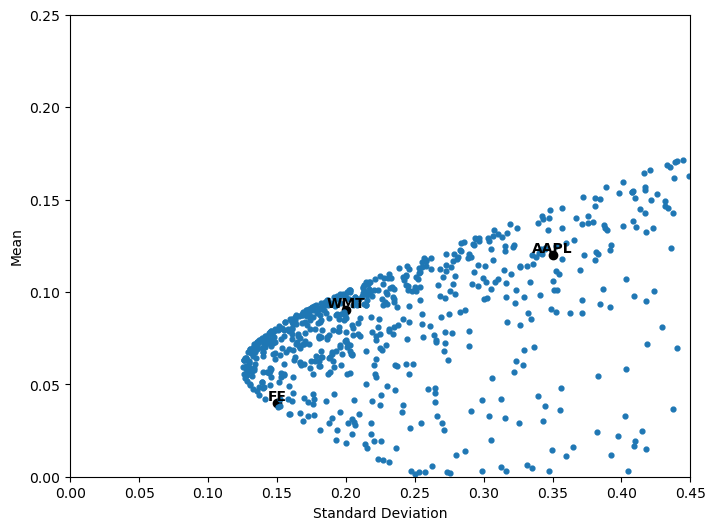

In [207]:
def plot_random_portfolios(n_simulations, n_assets):
    mu_p_sims = []
    sigma_p_sims = []
    for i in range(n_simulations):
        w = random_weights(n_assets)
        mu_p, sigma_p = mu_sigma_portfolio(w, mu, cov)
        mu_p_sims.append(mu_p)
        sigma_p_sims.append(sigma_p)
    plt.scatter(sigma_p_sims, mu_p_sims, s=12)

plot_points(mu, sigma,stocks)

n_simulations = 1000
n_assets = 3 
plot_random_portfolios(n_simulations, n_assets)    
plt.show();

In [212]:
# Compute the tangent portfolio

from math import sqrt
rf = 0.02

cov_inv = np.linalg.inv(cov)
ones = np.ones(n_assets)
A = ones @ cov_inv @ ones
B = ones @ cov_inv @ mu
C = mu @ cov_inv @ mu
y_tan = (C-B*rf)/(B-A*rf)
x_tan = sqrt(((C-2*B*rf+A*rf**2)/(B-A*rf)**2))
print('Tangent portfolio standard deviation:', x_tan)
print('Tangent portfolio expected return:', y_tan)

Tangent portfolio standard deviation: 0.1643881178081275
Tangent portfolio expected return: 0.08737452819726507
